# Get Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict
import sklearn.linear_model as linear_model
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import sklearn.metrics as metrics
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV




% matplotlib inline

In [2]:
train = pd.read_csv('/Users/harrypatterson/Documents/train.csv')
test = pd.read_csv('/Users/harrypatterson/Documents/test.csv')

In [3]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


# Test/Split Data

In [5]:
#Find best correlations for features
train.corr()['SalePrice'].sort_values()

PID               -0.255052
Enclosed Porch    -0.135656
Kitchen AbvGr     -0.125444
Overall Cond      -0.097019
MS SubClass       -0.087335
Id                -0.051398
Bsmt Half Bath    -0.045328
Low Qual Fin SF   -0.041594
Yr Sold           -0.015203
Misc Val          -0.007375
BsmtFin SF 2       0.016255
Pool Area          0.023106
Mo Sold            0.032735
3Ssn Porch         0.048732
Screen Porch       0.134581
Bedroom AbvGr      0.137067
Bsmt Unf SF        0.190210
2nd Flr SF         0.248452
Half Bath          0.283001
Bsmt Full Bath     0.283662
Lot Area           0.296566
Wood Deck SF       0.326490
Open Porch SF      0.333476
Lot Frontage       0.341842
BsmtFin SF 1       0.423519
Fireplaces         0.471093
TotRms AbvGrd      0.504014
Mas Vnr Area       0.512230
Garage Yr Blt      0.533922
Full Bath          0.537969
Year Remod/Add     0.550370
Year Built         0.571849
1st Flr SF         0.618486
Total Bsmt SF      0.628925
Garage Cars        0.648220
Garage Area        0

In [6]:
features = ['Overall Qual', 'Gr Liv Area', 'Garage Area', 
           'Garage Cars', 'Total Bsmt SF', '1st Flr SF', 'Year Built',
            'Year Remod/Add',
           'Full Bath', 'Garage Yr Blt', 'Mas Vnr Area', 'TotRms AbvGrd', 
            'Fireplaces', 'BsmtFin SF 1']
y = train['SalePrice']
X = train[features]

X_pred = test[features]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.4, 
                                                    random_state=1)

In [8]:
X_train.shape

(1230, 14)

# Clean Data

In [9]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1230 entries, 2003 to 1061
Data columns (total 14 columns):
Overall Qual      1230 non-null int64
Gr Liv Area       1230 non-null int64
Garage Area       1229 non-null float64
Garage Cars       1229 non-null float64
Total Bsmt SF     1229 non-null float64
1st Flr SF        1230 non-null int64
Year Built        1230 non-null int64
Year Remod/Add    1230 non-null int64
Full Bath         1230 non-null int64
Garage Yr Blt     1167 non-null float64
Mas Vnr Area      1212 non-null float64
TotRms AbvGrd     1230 non-null int64
Fireplaces        1230 non-null int64
BsmtFin SF 1      1229 non-null float64
dtypes: float64(6), int64(8)
memory usage: 144.1 KB


In [10]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 821 entries, 546 to 425
Data columns (total 14 columns):
Overall Qual      821 non-null int64
Gr Liv Area       821 non-null int64
Garage Area       821 non-null float64
Garage Cars       821 non-null float64
Total Bsmt SF     821 non-null float64
1st Flr SF        821 non-null int64
Year Built        821 non-null int64
Year Remod/Add    821 non-null int64
Full Bath         821 non-null int64
Garage Yr Blt     770 non-null float64
Mas Vnr Area      817 non-null float64
TotRms AbvGrd     821 non-null int64
Fireplaces        821 non-null int64
BsmtFin SF 1      821 non-null float64
dtypes: float64(6), int64(8)
memory usage: 96.2 KB


In [11]:
X_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 14 columns):
Overall Qual      879 non-null int64
Gr Liv Area       879 non-null int64
Garage Area       879 non-null float64
Garage Cars       879 non-null float64
Total Bsmt SF     879 non-null float64
1st Flr SF        879 non-null int64
Year Built        879 non-null int64
Year Remod/Add    879 non-null int64
Full Bath         879 non-null int64
Garage Yr Blt     834 non-null float64
Mas Vnr Area      878 non-null float64
TotRms AbvGrd     879 non-null int64
Fireplaces        879 non-null int64
BsmtFin SF 1      879 non-null float64
dtypes: float64(6), int64(8)
memory usage: 96.2 KB


In [12]:
# Find Null values 
X_train.isna().sum()[X_train.isna().sum() !=0]

Garage Area       1
Garage Cars       1
Total Bsmt SF     1
Garage Yr Blt    63
Mas Vnr Area     18
BsmtFin SF 1      1
dtype: int64

In [13]:
X_test.isna().sum()[X_test.isna().sum() !=0]

Garage Yr Blt    51
Mas Vnr Area      4
dtype: int64

In [14]:
X_pred.isna().sum()[X_pred.isna().sum() !=0]

Garage Yr Blt    45
Mas Vnr Area      1
dtype: int64

In [15]:
# replace all null values with average
X_train=X_train.fillna(X_train.mean())

In [16]:
X_test=X_test.fillna(X_test.mean())

In [17]:
X_pred=X_pred.fillna(X_pred.mean())

# Scale Data

In [18]:
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)

X_test = ss.transform(X_test)

X_pred = ss.transform(X_pred)

# Run Model

In [19]:
regression = linear_model.LinearRegression(
    fit_intercept = True, 
    normalize = False,
    copy_X = True,
    n_jobs = 1
)

model = regression.fit(X_train, y_train)
y_hat = model.predict(X_test)

y_hat

array([115808.88407887, 135492.6731932 , 197573.23012162, 253788.49072215,
       324850.29913516, 131155.71166829, 185065.07882736, 212269.86516669,
       135557.95040222, 314753.00714799, 118440.76629574, 135937.93070991,
       145725.41800723, 397089.91876892, 281499.18353534, 110704.34752086,
       216748.93787752, 178049.32743555, 211666.56538235,  29166.72593593,
       184986.15659456, 250708.5585548 ,  46074.16343437, 180440.87618762,
       111046.5509028 , 200587.55046463, 184958.63619705, 156464.33437182,
       205407.40900475, 151292.31506059,  50557.22853372, 265067.19817787,
        92738.28757705, 226543.23380709, 188060.25027917, 172478.69867417,
       166872.97751145, 153568.68916475, 262590.02162544, 272802.18219738,
       102717.90180772, 120240.61295324, 176308.76663739,  90894.86827982,
       103039.61990447, 266031.33436762, 186254.07840907, 100335.51594924,
       200531.22401741, 251107.53479684, 329683.60280786, 241743.0367693 ,
       237735.320492  , 3

In [20]:
model.score(X_test,y_test)

0.8315616686833762

In [21]:
y_pred = regression.predict(X_pred)

(array([  7.,  65., 254., 236., 181.,  87.,  34.,   9.,   3.,   3.]),
 array([  -544.80594778,  49135.53369059,  98815.87332895, 148496.21296731,
        198176.55260567, 247856.89224404, 297537.2318824 , 347217.57152076,
        396897.91115913, 446578.25079749, 496258.59043585]),
 <a list of 10 Patch objects>)

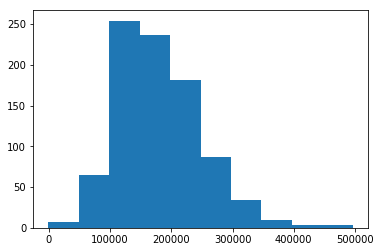

In [22]:
plt.hist(y_pred)

In [23]:
pd.Series(y_pred).to_csv('Second Attempt.csv')

In [24]:
y_pred.shape

(879,)

In [25]:
cross_val_score(linear_model.LinearRegression(), X_train, y_train, cv=3).mean()

0.770765556254451

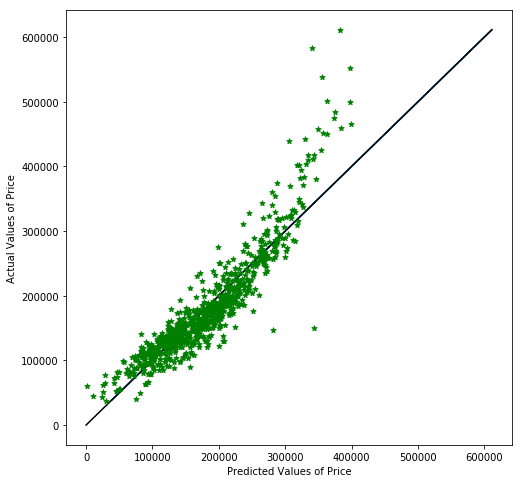

score:  0.8438240441980467


In [26]:
predictions = regression.predict(X_test)
y = y_test

# Plot the model
plt.figure(figsize=(8,8))
plt.scatter(predictions, y, s=30, c='g', marker='*', zorder=10)
plt.plot(y,y)
plt.xlabel("Predicted Values of Price")
plt.ylabel("Actual Values of Price")

plt.plot([0, np.max(y)], [0, np.max(y)], c = 'k')
# plt.plot(X_test, y_hat, color='blue', linewidth=3

plt.show()
score = cross_val_score(regression, X_test, y_test, cv=10)
print("score: ", score.mean())

# Try With Lasso

In [27]:
ss = StandardScaler()
ss.fit(X_train)
ss.transform(X_train)
ss.transform(X_test)
ss.transform(X_pred)

array([[-9.78521949e-02,  8.55317425e-01, -1.73356846e-01, ...,
         1.65488477e+00, -9.25832237e-01, -9.33075236e-01],
       [-7.97609170e-01,  9.32503513e-01,  4.81335403e-01, ...,
         2.28939483e+00, -9.25832237e-01, -9.33075236e-01],
       [ 6.01904780e-01,  3.33073172e-04, -2.38826070e-01, ...,
         3.85864654e-01,  6.40568934e-01,  2.33336906e-01],
       ...,
       [-7.97609170e-01, -5.63719104e-01, -7.25168884e-01, ...,
        -8.83155464e-01,  6.40568934e-01, -4.06715966e-01],
       [-1.49736614e+00, -1.25047737e+00,  2.38163996e-01, ...,
        -8.83155464e-01, -9.25832237e-01,  3.63874005e-01],
       [-7.97609170e-01, -1.12975041e+00, -4.07175506e-01, ...,
        -8.83155464e-01,  2.20697010e+00,  7.36536368e-01]])

In [28]:
optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=0)
optimal_lasso.fit(X_train, y_train)

print(optimal_lasso.alpha_)

1165.8150871697185


In [29]:
optimal_lasso.score(X_test,y_test)

0.827909158592466

In [30]:
lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso_scores = cross_val_score(lasso, X_train, y_train, cv=10)

# print(lasso_scores)
print(np.mean(lasso_scores))

0.7361402767176808


In [31]:
lasso.fit(X_train, y_train)
lasso.score(X_test,y_test)

0.827909158592466

In [32]:
X_train.shape

(1230, 14)

In [33]:
lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso_scores = cross_val_score(lasso, X_train, y_train, cv=10)

print(lasso_scores)
#print(np.mean(lasso_scores))

[0.59936784 0.87280767 0.7471504  0.79920728 0.84448565 0.84550146
 0.8344179  0.77551604 0.83337069 0.20957784]


# Run with ridge mode

In [34]:
ridge_alphas = np.logspace(0, 5, 200)

optimal_ridge = RidgeCV(alphas = ridge_alphas, cv=10)
optimal_ridge.fit(X_train, y_train)

print(optimal_ridge.alpha_)

258.2618760682677


In [35]:
optimal_ridge.score(X_test,y_test)

0.8294474999027305

In [36]:
ridge = Ridge(alpha=optimal_ridge.alpha_)

ridge_scores = cross_val_score(ridge, X_train, y_train, cv=10)

# print(ridge_scores)
print(np.mean(ridge_scores))

0.738915085016677
